# Plotting ShotMaps for Brighton vs Manchester United [May 19, 2024] 

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from highlight_text import fig_text
from matplotlib.patches import Arc
import numpy as np

## Scraping shots data from Understat

In [2]:
# Getting the match ID and deducing the url
base_url = "https://understat.com/match/"
match = str(input("Enter the match ID: "))
url = base_url + match
url

Enter the match ID:  22267


'https://understat.com/match/22267'

In [3]:
# Scraping the resources from the url
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
scripts = soup.find_all('script')

In [4]:
strings = scripts[1].string

In [5]:
strings

"\n\tvar shotsData \t= JSON.parse('\\x7B\\x22h\\x22\\x3A\\x5B\\x7B\\x22id\\x22\\x3A\\x22582128\\x22,\\x22minute\\x22\\x3A\\x224\\x22,\\x22result\\x22\\x3A\\x22MissedShots\\x22,\\x22X\\x22\\x3A\\x220.960999984741211\\x22,\\x22Y\\x22\\x3A\\x220.40299999237060546\\x22,\\x22xG\\x22\\x3A\\x220.018925296142697334\\x22,\\x22player\\x22\\x3A\\x22Adam\\x20Webster\\x22,\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22player_id\\x22\\x3A\\x227699\\x22,\\x22situation\\x22\\x3A\\x22FromCorner\\x22,\\x22season\\x22\\x3A\\x222023\\x22,\\x22shotType\\x22\\x3A\\x22Head\\x22,\\x22match_id\\x22\\x3A\\x2222267\\x22,\\x22h_team\\x22\\x3A\\x22Brighton\\x22,\\x22a_team\\x22\\x3A\\x22Manchester\\x20United\\x22,\\x22h_goals\\x22\\x3A\\x220\\x22,\\x22a_goals\\x22\\x3A\\x222\\x22,\\x22date\\x22\\x3A\\x222024\\x2D05\\x2D19\\x2015\\x3A00\\x3A00\\x22,\\x22player_assisted\\x22\\x3A\\x22Pascal\\x20Gro\\x5Cu00df\\x22,\\x22lastAction\\x22\\x3A\\x22Aerial\\x22\\x7D,\\x7B\\x22id\\x22\\x3A\\x22582130\\x22,\\x22minute\\x22\\x3A\\x2211\\

In [6]:
# strip unnecessary symbols and get only JSON data 
ind_start = strings.index("('")+2 
ind_end = strings.index("')") 
json_data = strings[ind_start:ind_end] 
json_data = json_data.encode('utf8').decode('unicode_escape')

# convert to json format
data = json.loads(json_data)

In [7]:
data

{'h': [{'id': '582128',
   'minute': '4',
   'result': 'MissedShots',
   'X': '0.960999984741211',
   'Y': '0.40299999237060546',
   'xG': '0.018925296142697334',
   'player': 'Adam Webster',
   'h_a': 'h',
   'player_id': '7699',
   'situation': 'FromCorner',
   'season': '2023',
   'shotType': 'Head',
   'match_id': '22267',
   'h_team': 'Brighton',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '2',
   'date': '2024-05-19 15:00:00',
   'player_assisted': 'Pascal Groß',
   'lastAction': 'Aerial'},
  {'id': '582130',
   'minute': '11',
   'result': 'SavedShot',
   'X': '0.9069999694824219',
   'Y': '0.6569999694824219',
   'xG': '0.27490857243537903',
   'player': 'Valentín Barco',
   'h_a': 'h',
   'player_id': '12498',
   'situation': 'OpenPlay',
   'season': '2023',
   'shotType': 'LeftFoot',
   'match_id': '22267',
   'h_team': 'Brighton',
   'a_team': 'Manchester United',
   'h_goals': '0',
   'a_goals': '2',
   'date': '2024-05-19 15:00:00',
   'player_assist

In [8]:
# Creating different json data for home and away teams
home_team_data = data['h']
away_team_data = data['a']
home_team = home_team_data[0]['h_team']
away_team = away_team_data[0]['a_team']

In [9]:
home_team_data

[{'id': '582128',
  'minute': '4',
  'result': 'MissedShots',
  'X': '0.960999984741211',
  'Y': '0.40299999237060546',
  'xG': '0.018925296142697334',
  'player': 'Adam Webster',
  'h_a': 'h',
  'player_id': '7699',
  'situation': 'FromCorner',
  'season': '2023',
  'shotType': 'Head',
  'match_id': '22267',
  'h_team': 'Brighton',
  'a_team': 'Manchester United',
  'h_goals': '0',
  'a_goals': '2',
  'date': '2024-05-19 15:00:00',
  'player_assisted': 'Pascal Groß',
  'lastAction': 'Aerial'},
 {'id': '582130',
  'minute': '11',
  'result': 'SavedShot',
  'X': '0.9069999694824219',
  'Y': '0.6569999694824219',
  'xG': '0.27490857243537903',
  'player': 'Valentín Barco',
  'h_a': 'h',
  'player_id': '12498',
  'situation': 'OpenPlay',
  'season': '2023',
  'shotType': 'LeftFoot',
  'match_id': '22267',
  'h_team': 'Brighton',
  'a_team': 'Manchester United',
  'h_goals': '0',
  'a_goals': '2',
  'date': '2024-05-19 15:00:00',
  'player_assisted': 'Carlos Baleba',
  'lastAction': 'Pass'

## Creating shot dataframes for both teams

In [10]:
# Creating the necessary columns for the final dataframe
x = []
y = []
xG = []
result = []
team = []

# Appending the values to the respective columns
for index in range(len(home_team_data)):
    for key in home_team_data[index]:
        if key == 'X':
            x.append(home_team_data[index][key])
        if key == 'Y':
            y.append(home_team_data[index][key])
        if key == 'h_team':
            team.append(home_team_data[index][key])
        if key == 'xG':
            xG.append(home_team_data[index][key])
        if key == 'result':
            result.append(home_team_data[index][key])

for index in range(len(away_team_data)):
    for key in away_team_data[index]:
        if key == 'X':
            x.append(away_team_data[index][key])
        if key == 'Y':
            y.append(away_team_data[index][key])
        if key == 'a_team':
            team.append(away_team_data[index][key])
        if key == 'xG':
            xG.append(away_team_data[index][key])
        if key == 'result':
            result.append(away_team_data[index][key])

In [11]:
# Creating the dataframe
col_names = ['x','y','xG','result','team']
df = pd.DataFrame([x,y,xG,result,team],index=col_names)
df = df.T

In [12]:
df

,x,y,xG,result,team
0,0.960999984741211,0.40299999237060546,0.018925296142697334,MissedShots,Brighton
1,0.9069999694824219,0.6569999694824219,0.27490857243537903,SavedShot,Brighton
2,0.9030000305175782,0.4129999923706055,0.0625562071800232,SavedShot,Brighton
3,0.860999984741211,0.4520000076293945,0.10473421216011047,BlockedShot,Brighton
4,0.904000015258789,0.5579999923706055,0.03518944978713989,MissedShots,Brighton
5,0.799000015258789,0.37,0.026056284084916115,BlockedShot,Brighton
6,0.9130000305175782,0.43099998474121093,0.05778523162007332,BlockedShot,Brighton
7,0.93,0.39799999237060546,0.3987084627151489,MissedShots,Brighton
8,0.7709999847412109,0.4129999923706055,0.024687567725777626,BlockedShot,Brighton
9,0.9069999694824219,0.6480000305175782,0.09209132194519043,BlockedShot,Brighton


In [13]:
# Adjusting the locations as per the pitch dimensions
df['x'] = df['x'].astype('float64')
df['y'] = df['y'].astype('float64')
df['xG'] = df['xG'].astype('float64')
df['x_adj'] = df['x']*105
df['y_adj'] = 68 - df['y']*68
df

,x,y,xG,result,team,x_adj,y_adj
0,0.961,0.403,0.018925,MissedShots,Brighton,100.904998,40.596001
1,0.907,0.657,0.274909,SavedShot,Brighton,95.234997,23.324002
2,0.903,0.413,0.062556,SavedShot,Brighton,94.815003,39.916001
3,0.861,0.452,0.104734,BlockedShot,Brighton,90.404998,37.263999
4,0.904,0.558,0.035189,MissedShots,Brighton,94.920002,30.056001
5,0.799,0.370,0.026056,BlockedShot,Brighton,83.895002,42.840000
6,0.913,0.431,0.057785,BlockedShot,Brighton,95.865003,38.692001
7,0.930,0.398,0.398708,MissedShots,Brighton,97.650000,40.936001
8,0.771,0.413,0.024688,BlockedShot,Brighton,80.954998,39.916001
9,0.907,0.648,0.092091,BlockedShot,Brighton,95.234997,23.935998


In [14]:
# Splitting the home and away dataframes
home_df = df[df['team'] == home_team]
away_df = df[df['team'] == away_team]

## Creating a football pitch using Matplotlib

In [15]:
# Setting dimensions, colour, orientation of football pitch
def football_pitch(x_min=0, x_max=105,
               y_min=0, y_max=68,
               pitch_color="#f0f0f0",
               line_color='black',
               line_thickness=1.5,
               point_size=20,
               orientation="horizontal",
               aspect="full",
               axis='off',
               ax=None
               ):

    if not ax:
        raise TypeError("This function is intended to be used with an existing fig and ax in order to allow flexibility in plotting of various sizes and in subplots.")

    if orientation.lower().startswith("h"):
        first = 0
        second = 1
        arc_angle = 0

        if aspect == "half":
            ax.set_xlim(x_max / 2, x_max + 5)

    elif orientation.lower().startswith("v"):
        first = 1
        second = 0
        arc_angle = 90

        if aspect == "half":
            ax.set_ylim(x_max / 2, x_max + 5)

    
    else:
        raise NameError("You must choose one of horizontal or vertical")

    ax.axis(axis)

    rect = plt.Rectangle((x_min, y_min),
                         x_max, y_max,
                         facecolor=pitch_color,
                         edgecolor="none",
                         zorder=-2)

    ax.add_artist(rect)

    x_conversion = x_max / 100
    y_conversion = y_max / 100

    pitch_x = [0,5.8,11.5,17,50,83,88.5,94.2,100] # x dimension markings
    pitch_x = [x * x_conversion for x in pitch_x]

    pitch_y = [0, 21.1, 36.6, 50, 63.2, 78.9, 100] # y dimension markings
    pitch_y = [x * y_conversion for x in pitch_y]

    goal_y = [45.2, 54.8] # goal posts
    goal_y = [x * y_conversion for x in goal_y]

    # side and goal lines
    lx1 = [x_min, x_max, x_max, x_min, x_min]
    ly1 = [y_min, y_min, y_max, y_max, y_min]

    # outer box
    lx2 = [x_max, pitch_x[5], pitch_x[5], x_max]
    ly2 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    lx3 = [0, pitch_x[3], pitch_x[3], 0]
    ly3 = [pitch_y[1], pitch_y[1], pitch_y[5], pitch_y[5]]

    # goals
    lx4 = [x_max, x_max+2, x_max+2, x_max]
    ly4 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    lx5 = [0, -2, -2, 0]
    ly5 = [goal_y[0], goal_y[0], goal_y[1], goal_y[1]]

    # 6 yard box
    lx6 = [x_max, pitch_x[7], pitch_x[7], x_max]
    ly6 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    lx7 = [0, pitch_x[1], pitch_x[1], 0]
    ly7 = [pitch_y[2],pitch_y[2], pitch_y[4], pitch_y[4]]

    # Halfline, penalty spots, and kickoff spot
    lx8 = [pitch_x[4], pitch_x[4]]
    ly8 = [0, y_max]

    lines = [
        [lx1, ly1],
        [lx2, ly2],
        [lx3, ly3],
        [lx4, ly4],
        [lx5, ly5],
        [lx6, ly6],
        [lx7, ly7],
        [lx8, ly8],
        ]

    points = [
        [pitch_x[6], pitch_y[3]],
        [pitch_x[2], pitch_y[3]],
        [pitch_x[4], pitch_y[3]]
        ]

    circle_points = [pitch_x[4], pitch_y[3]]
    arc_points1 = [pitch_x[6], pitch_y[3]]
    arc_points2 = [pitch_x[2], pitch_y[3]]

    for line in lines:
        ax.plot(line[first], line[second],
                color=line_color,
                lw=line_thickness,
                zorder=-1)

    for point in points:
        ax.scatter(point[first], point[second],
                   color=line_color,
                   s=point_size,
                   zorder=-1)

    circle = plt.Circle((circle_points[first], circle_points[second]),
                        x_max * 0.088,
                        lw=line_thickness,
                        color=line_color,
                        fill=False,
                        zorder=-1)

    ax.add_artist(circle)

    arc1 = Arc((arc_points1[first], arc_points1[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=128.75,
               theta2=231.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc1)

    arc2 = Arc((arc_points2[first], arc_points2[second]),
               height=x_max * 0.088 * 2,
               width=x_max * 0.088 * 2,
               angle=arc_angle,
               theta1=308.75,
               theta2=51.25,
               color=line_color,
               lw=line_thickness,
               zorder=-1)

    ax.add_artist(arc2)

    ax.set_aspect("equal")

    return ax

## Creating the ShotMap for Brighton

In [16]:
# New dictionaries for home team
total_shots_home = home_df[home_df.columns[0]].count().tolist()
xGcum_home = np.round(max(np.cumsum(home_df['xG'])),3).tolist()
xG_per_shot_home = np.round(max(np.cumsum(home_df['xG']))/(home_df[home_df.columns[0]].count()),3).tolist()
goal_home = home_df[home_df['result']=='Goal']
shot_on_post_home = home_df[home_df['result']=='ShotOnPost']
blocked_shot_home = home_df[home_df['result']=='BlockedShot']
saved_shot_home = home_df[home_df['result']=='SavedShot']
missed_shot_home = home_df[home_df['result']=='MissedShots']
goals_home = goal_home[goal_home.columns[0]].count().tolist()

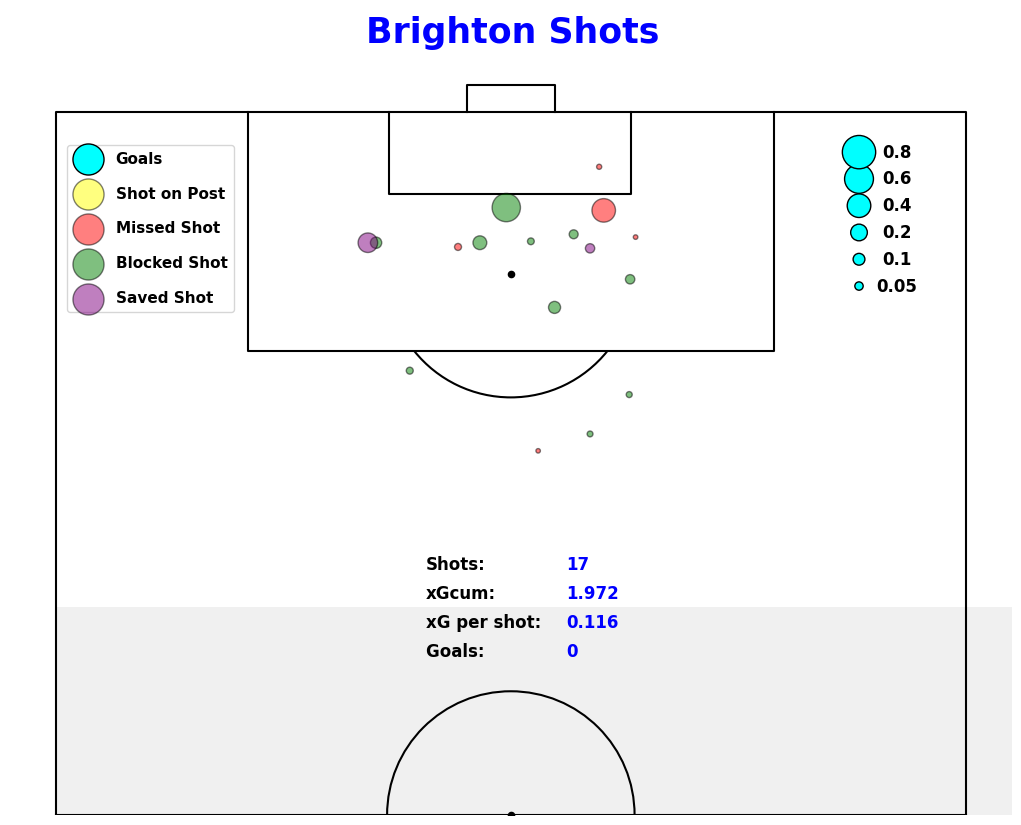

In [17]:
#Home Team Vizz
fig, ax = plt.subplots(figsize=(20, 10))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax,axis="off")

#Drawing a full pitch horizontally
z = goal_home['xG'].tolist()
z1 = [500 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal_home["x_adj"],x=goal_home["y_adj"],s=goal_home['xG']*720, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post_home["x_adj"],x=shot_on_post_home["y_adj"],s=shot_on_post_home['xG']*720, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot_home["x_adj"],x=missed_shot_home["y_adj"],s=missed_shot_home['xG']*720, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot_home["x_adj"],x=blocked_shot_home["y_adj"],s=blocked_shot_home['xG']*720, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot_home["x_adj"],x=saved_shot_home["y_adj"],s=saved_shot_home['xG']*720, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)

# legend
legend = ax.legend(loc="upper center",bbox_to_anchor= (0.14, 0.88),labelspacing=1.3,prop={'weight':'bold','size':11})
legend.legend_handles[0]._sizes = [500]
legend.legend_handles[1]._sizes = [500]
legend.legend_handles[2]._sizes = [500]
legend.legend_handles[3]._sizes = [500]
legend.legend_handles[4]._sizes = [500]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.8, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')
    
# Annotation text
fig_text(0.44,0.91, s="{} Shots\n".format(home_team), fontsize = 25, fontweight = "bold",c='blue')
fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots_home, xGcum_home, xG_per_shot_home, goals_home), fontsize = 12, fontweight = "bold",c='blue')

## Creating the ShotMap for Manchester United

In [18]:
# New dictionaries for away team
total_shots_away = away_df[away_df.columns[0]].count().tolist()
xGcum_away = np.round(max(np.cumsum(away_df['xG'])),3).tolist()
xG_per_shot_away = np.round(max(np.cumsum(away_df['xG']))/(away_df[away_df.columns[0]].count()),3).tolist()
goal_away = away_df[away_df['result']=='Goal']
shot_on_post_away = away_df[away_df['result']=='ShotOnPost']
blocked_shot_away = away_df[away_df['result']=='BlockedShot']
saved_shot_away = away_df[away_df['result']=='SavedShot']
missed_shot_away = away_df[away_df['result']=='MissedShots']
goals_away = goal_away[goal_away.columns[0]].count().tolist()

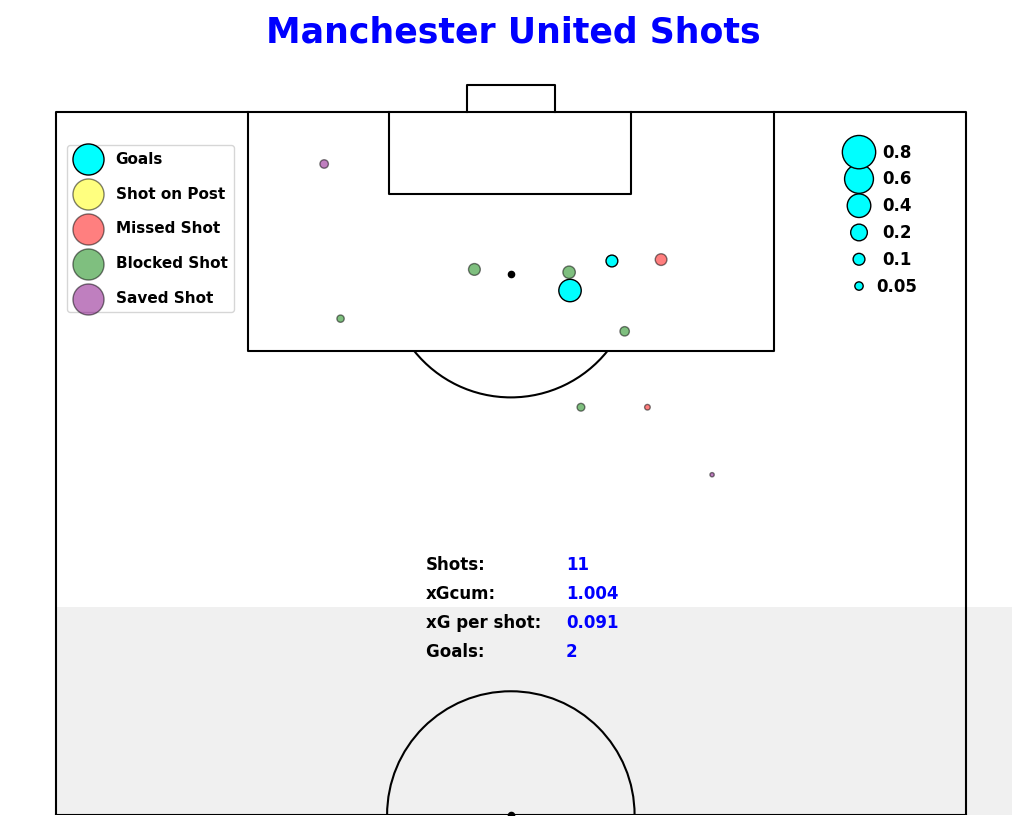

In [19]:
# Away Team Vizz
fig, ax = plt.subplots(figsize=(20, 10))
football_pitch(orientation="vertical",aspect="half",line_color="black",ax=ax,axis="off")

# Drawing a full pitch horizontally
z = goal_away['xG'].tolist()
z1 = [500 * i for i in z] # This is to scale the "xG" values for plotting
color = {'Goal':'cyan', 'MissedShots':'red', 'BlockedShot':'tomato', 'SavedShot':'black', 'ShotOnPost':'Yellow'}

# Plotting the goals, the missed chances shot on post etc 
plt.scatter(y=goal_away["x_adj"],x=goal_away["y_adj"],s=goal_away['xG']*720, marker='o',color='cyan',edgecolors="black",label='Goals')
plt.scatter(y=shot_on_post_away["x_adj"],x=shot_on_post_away["y_adj"],s=shot_on_post_away['xG']*720, marker='o',color='yellow',edgecolors="black",label='Shot on Post',alpha=0.5)
plt.scatter(y=missed_shot_away["x_adj"],x=missed_shot_away["y_adj"],s=missed_shot_away['xG']*720, marker='o',color='red',edgecolors="black",label='Missed Shot',alpha=0.5)
plt.scatter(y=blocked_shot_away["x_adj"],x=blocked_shot_away["y_adj"],s=blocked_shot_away['xG']*720, marker='o',color='green',edgecolors="black",label='Blocked Shot',alpha=0.5)
plt.scatter(y=saved_shot_away["x_adj"],x=saved_shot_away["y_adj"],s=saved_shot_away['xG']*720, marker='o',color='purple',edgecolors="black",label='Saved Shot',alpha=0.5)

# legend
legend = ax.legend(loc="upper center",bbox_to_anchor= (0.14, 0.88),labelspacing=1.3,prop={'weight':'bold','size':11})
legend.legend_handles[0]._sizes = [500]
legend.legend_handles[1]._sizes = [500]
legend.legend_handles[2]._sizes = [500]
legend.legend_handles[3]._sizes = [500]
legend.legend_handles[4]._sizes = [500]

# xG Size 
mSize = [0.05,0.10,0.2,0.4,0.6,0.8]
mSizeS = [720 * i for i in mSize]
mx = [60,60,60,60,60,60]
my = [92,94,96,98,100,102]
plt.scatter(mx,my,s=mSizeS,facecolors="cyan", edgecolor="black")
for i in range(len(mx)):
    plt.text(mx[i]+ 2.8, my[i], mSize[i], fontsize=12, color="black",ha="center", va="center",fontweight='bold')
    
# Annotation text
fig_text(0.39,0.91, s="{} Shots\n".format(away_team), fontsize = 25, fontweight = "bold",c='blue')
fig_text(0.47,0.37, s="Shots:\n\nxGcum:\n\nxG per shot:\n\nGoals: ", fontsize = 12, fontweight = "bold",c='black')
fig_text(0.54,0.37, s="<{}\n\n{}\n\n{}\n\n{}>".format(total_shots_away, xGcum_away, xG_per_shot_away, goals_away), fontsize = 12, fontweight = "bold",c='blue')